<a href="https://colab.research.google.com/github/JVCarmich0959/CSC228/blob/main/CNN_for_Character_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Flatten



In [14]:

# Load the MNIST dataset of handwritten digits
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:

# Reshape the input images to 28x28 grayscale and normalize pixel values to [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [16]:
# Convert the output labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [17]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 60s 122ms/step - loss: 0.2073 - accuracy: 0.9383 - val_loss: 0.0594 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 56s 119ms/step - loss: 0.0562 - accuracy: 0.9828 - val_loss: 0.0370 - val_accuracy: 0.9872
Epoch 3/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 0.0386 - val_accuracy: 0.9873
Epoch 4/10
469/469 [==============================] - 55s 117ms/step - loss: 0.0302 - accuracy: 0.9908 - val_loss: 0.0316 - val_accuracy: 0.9891
Epoch 5/10
469/469 [==============================] - 55s 118ms/step - loss: 0.0238 - accuracy: 0.9923 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 6/10
469/469 [==============================] - 57s 122ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0277 - val_accuracy: 0.9901
Epoch 7/10
469/469 [==============================] - 54s 116ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.0287 - val_ac

In [19]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.03195508196949959
Test accuracy: 0.9894999861717224


In [20]:
# Make predictions on a sample of test images
y_pred = model.predict(X_test[:10])
y_pred = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 313ms/step


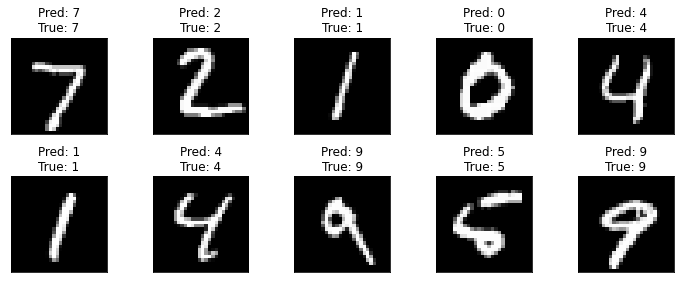

In [26]:
# Visualize the predicted and actual labels of the sample images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('Pred: {}\nTrue: {}'.format(y_pred[i], np.argmax(y_test[i])))
plt.tight_layout()
plt.show()
